In [5]:
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.mlab as ml
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LightSource
import pickle
import datetime
import pandas as pd
import os
import seaborn as sns
sns.reset_orig()
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.misc import imread
from scipy.spatial import voronoi_plot_2d
from scipy.spatial import Voronoi
from map_overlay import MapOverlay
import utils
import figure_functions

In [6]:
curr_dir = os.getcwd()
data_path = curr_dir + '/../data/'
fig_path = curr_dir + '/../figs/'

In [7]:
params = utils.load_data(data_path)

gps_loc, avg_loads, park_data, N, P, idx_to_day_hour, day_hour_to_idx = params

time = 1

## 3D Surface Plot

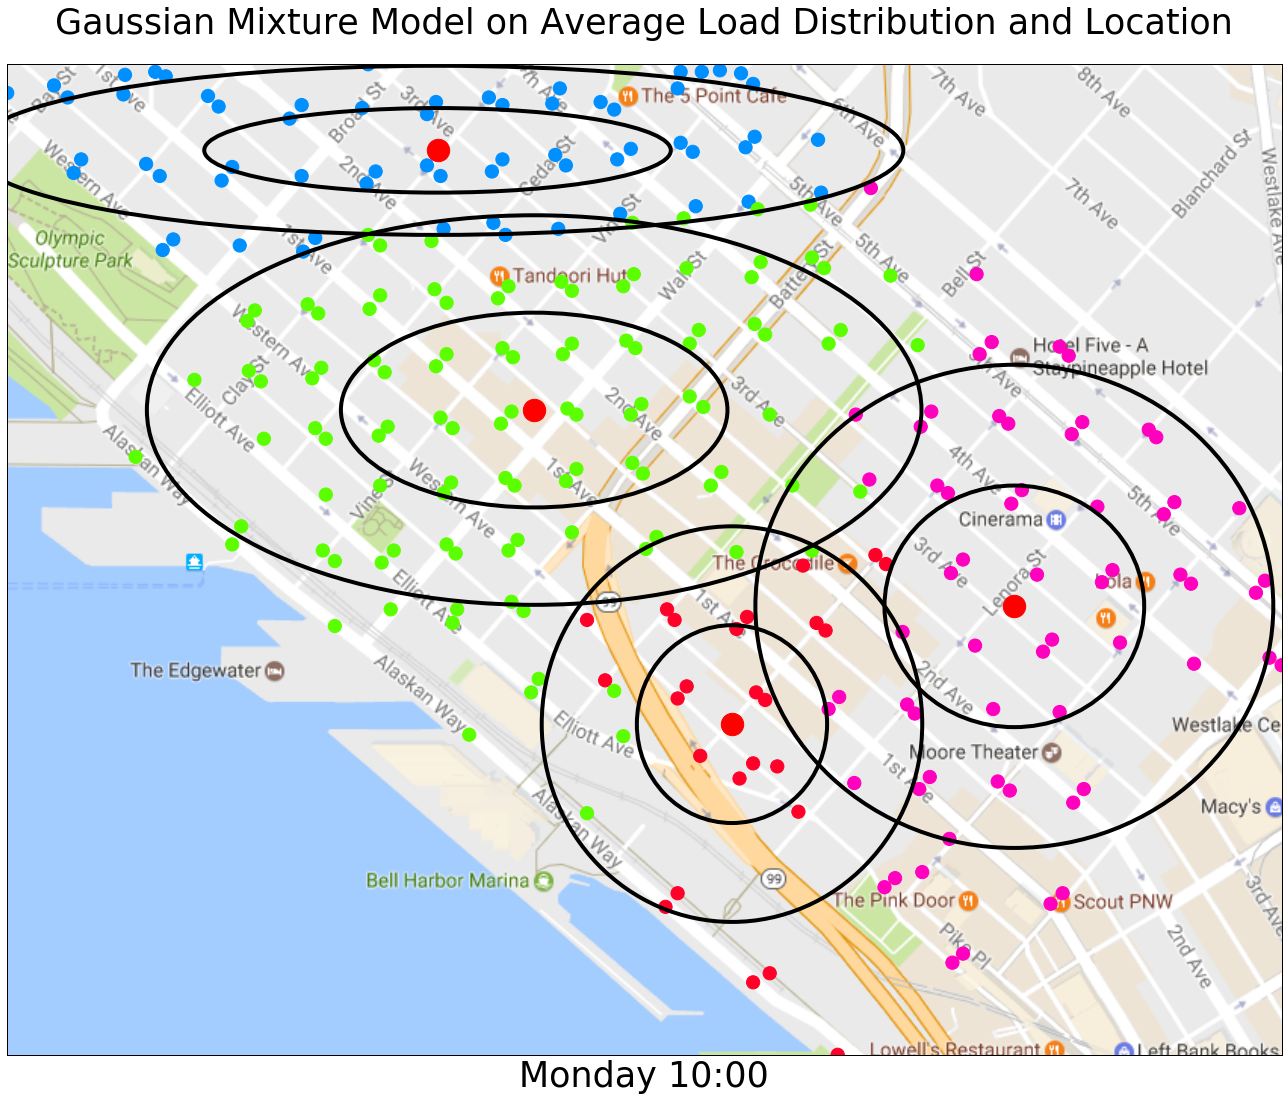

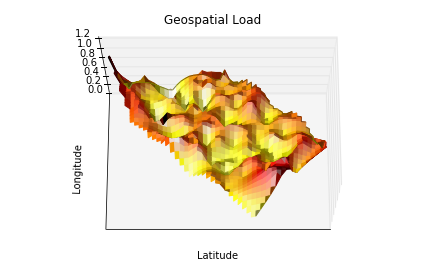

In [8]:
fig, ax = figure_functions.surface_plot(loads=avg_loads, gps_loc=gps_loc, time=4, 
                                        fig_path=fig_path)
plt.show()

## Interpolation

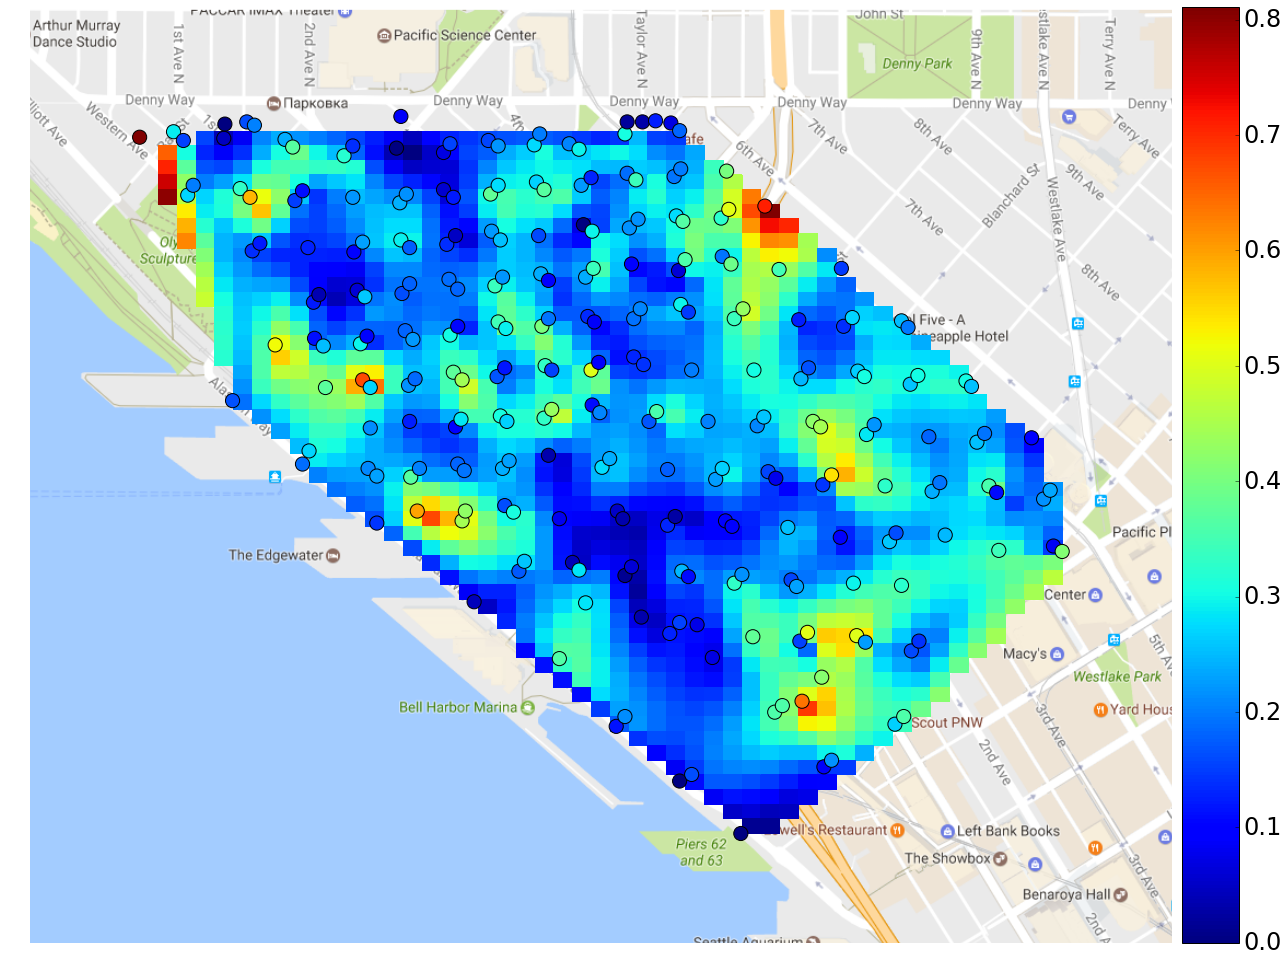

In [9]:
fig, ax = figure_functions.interpolation(loads=avg_loads, gps_loc=gps_loc, time=time,
                                         N=N, fig_path=fig_path)
plt.show()

## Triangular Grid

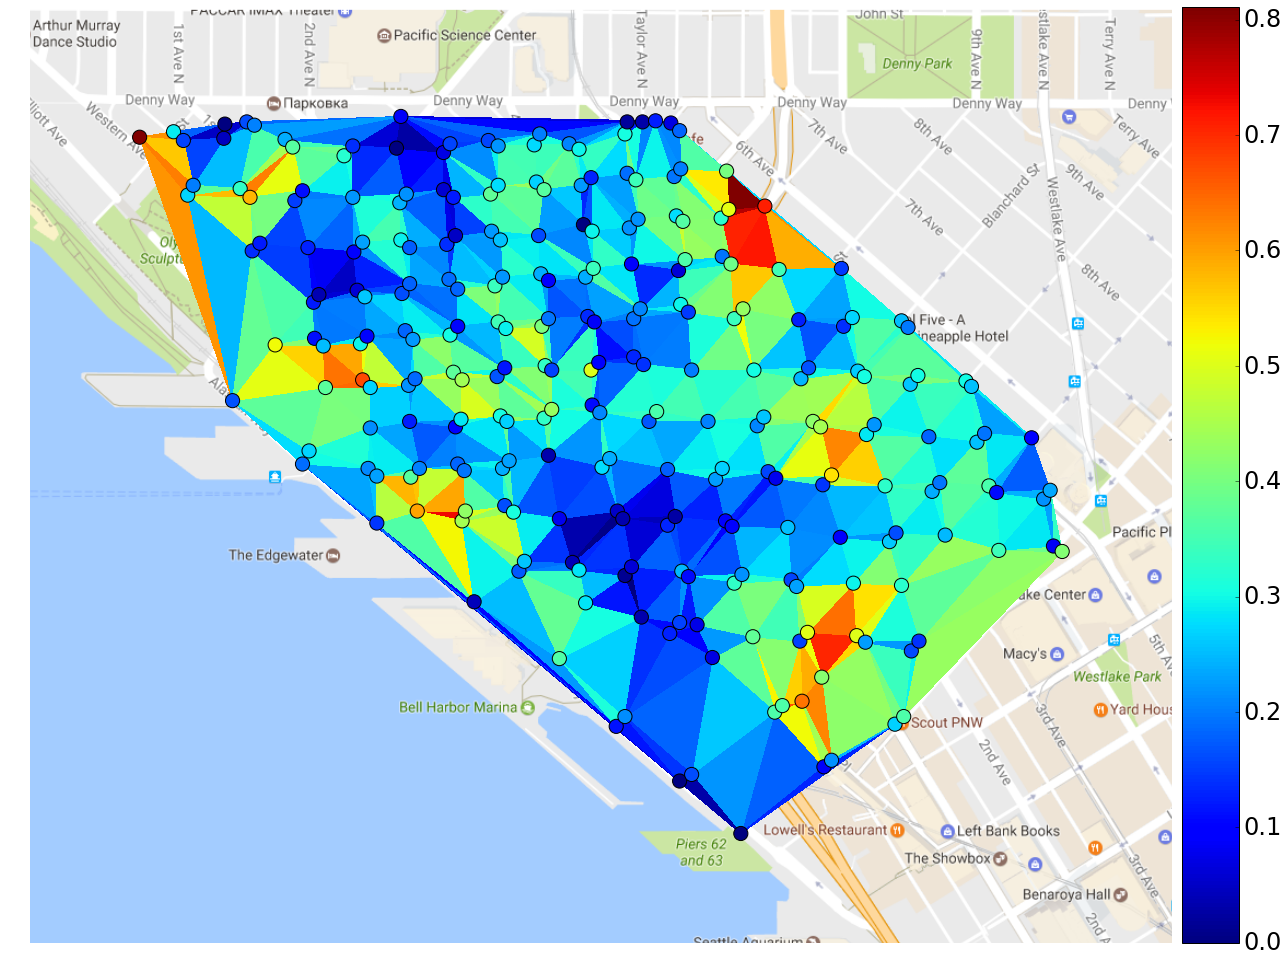

In [10]:
fig, ax = figure_functions.triangular_grid(loads=avg_loads, gps_loc=gps_loc, time=time,
                                           N=N, fig_path=fig_path)
plt.show()

## Contour Plot

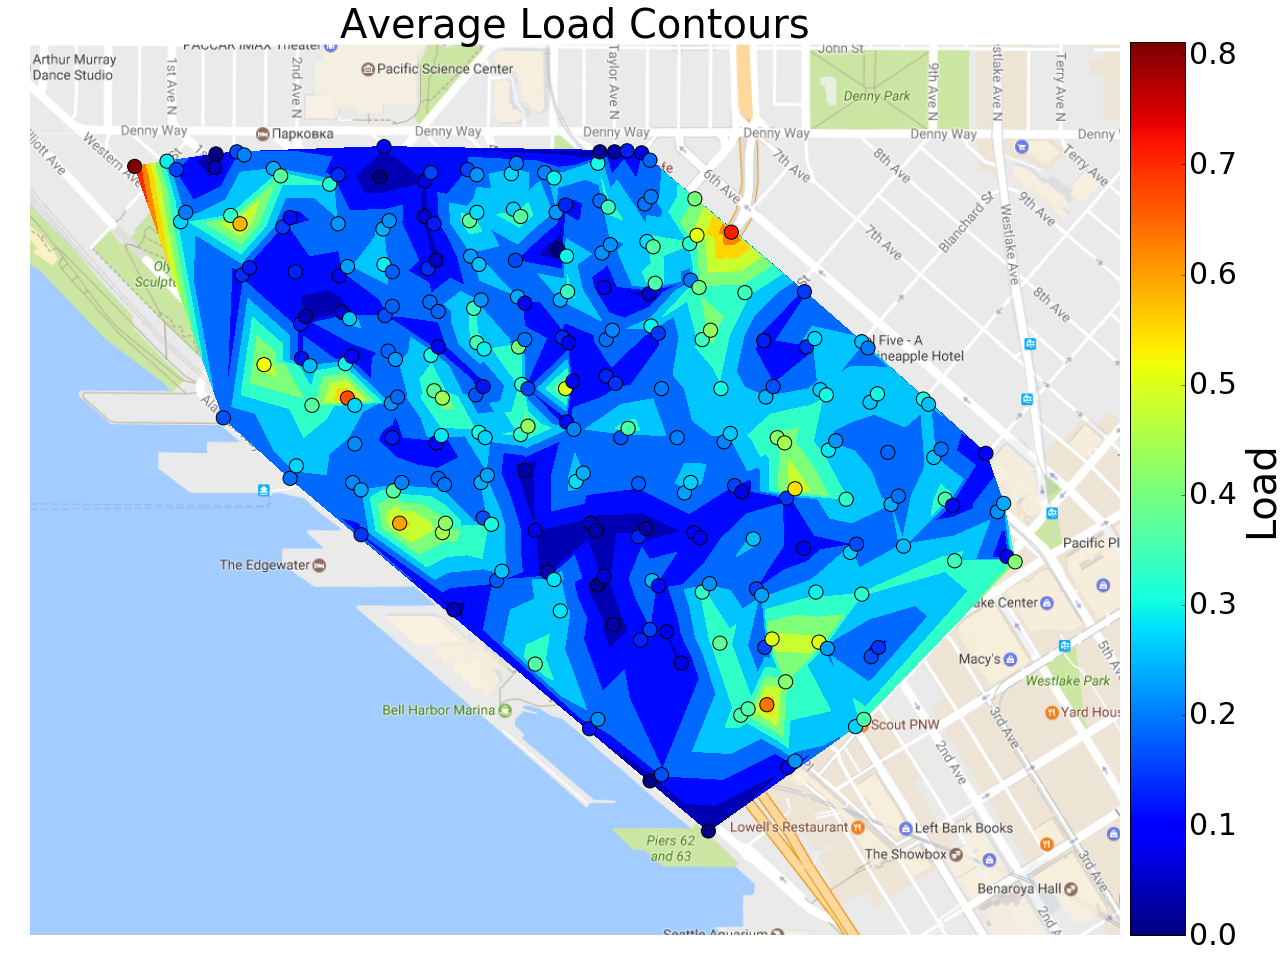

In [12]:
fig, ax = figure_functions.contour_plot(loads=avg_loads, gps_loc=gps_loc, time=time,
                                        title='Average Load Contours', N=N, fig_path=fig_path)
plt.show()

## Voronoi Diagram

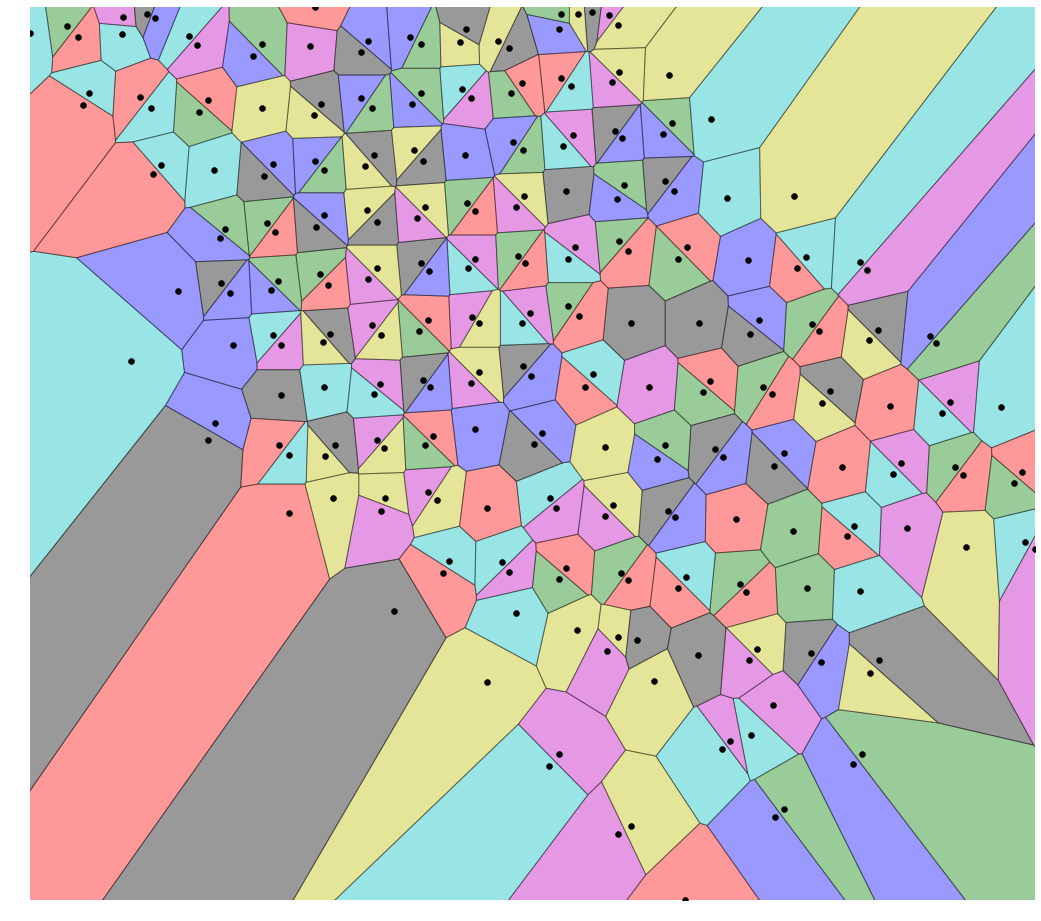

In [13]:
fig, ax = figure_functions.voronoi(gps_loc=gps_loc, N=N, fig_path=fig_path)
plt.show()

## Spatial Heterogeneity

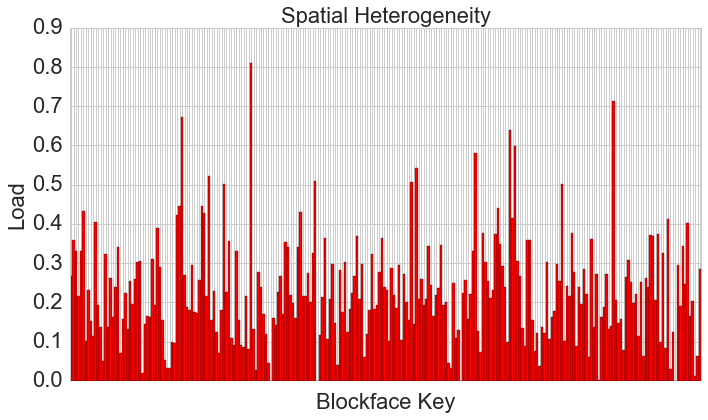

In [14]:
fig, ax = figure_functions.spatial_heterogeneity(loads=avg_loads, time=time, 
                                                N=N, fig_path=fig_path)
plt.show()

# Mixture Plot

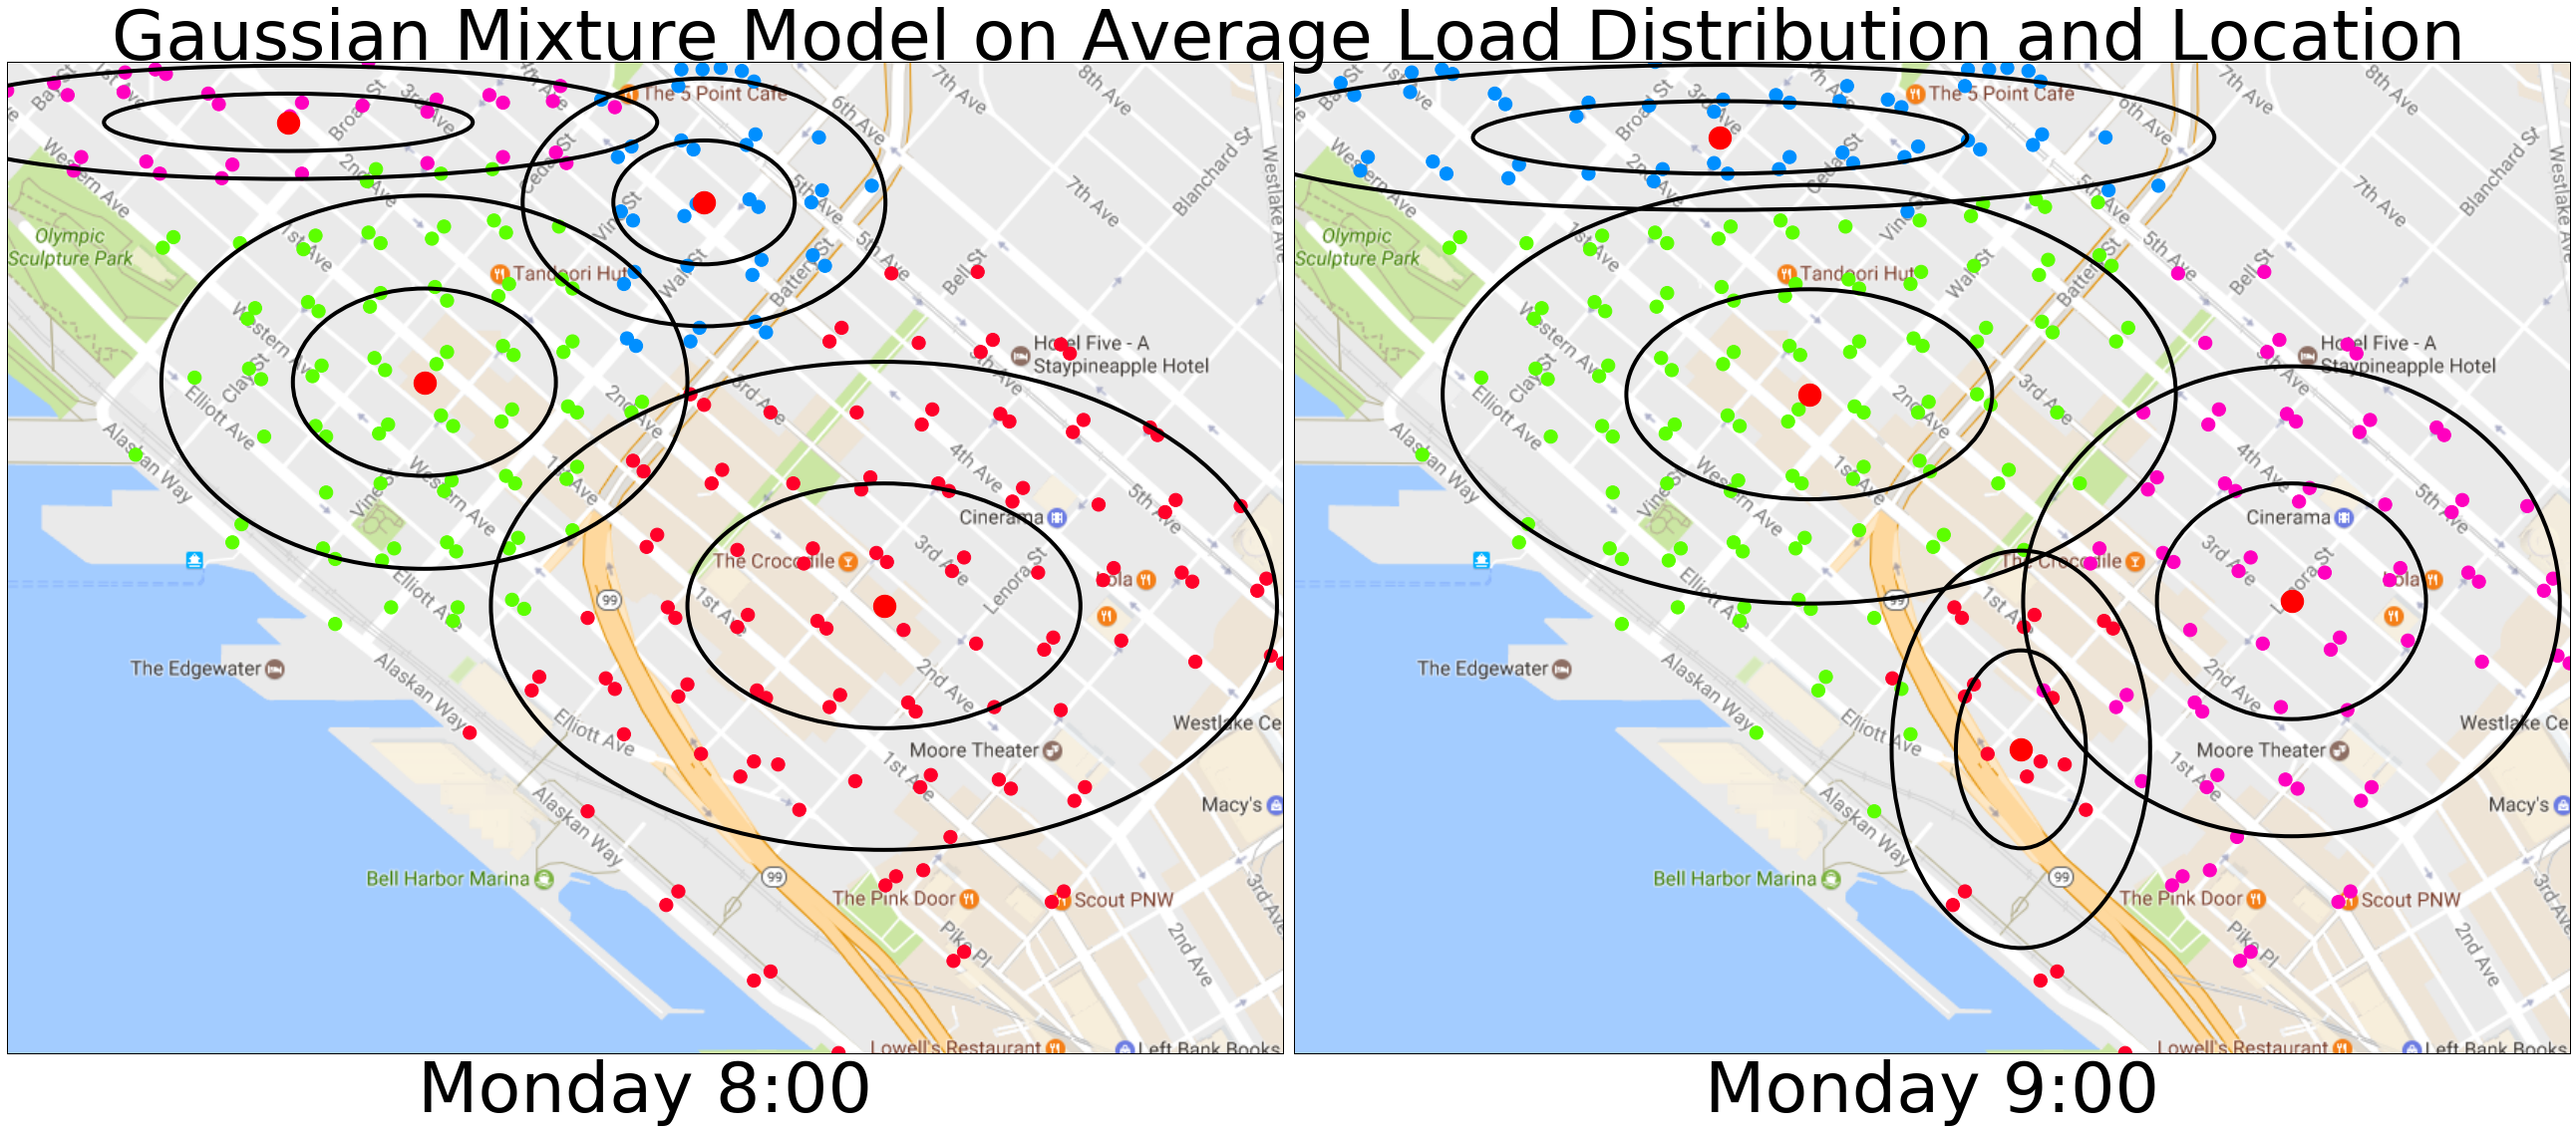

In [24]:
fig, ax, means = figure_functions.mixture_plot(avg_loads, gps_loc, [0,1], N, fig_path, shape=(1,2))
plt.show()

## Temporal Heterogeneity

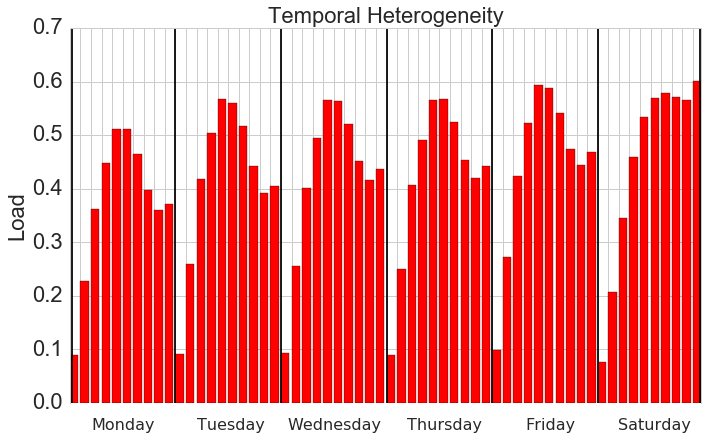

In [16]:
fig, ax = figure_functions.temporal_heterogeneity(loads=avg_loads, time=time, 
                                                P=P, fig_path=fig_path)
plt.show()

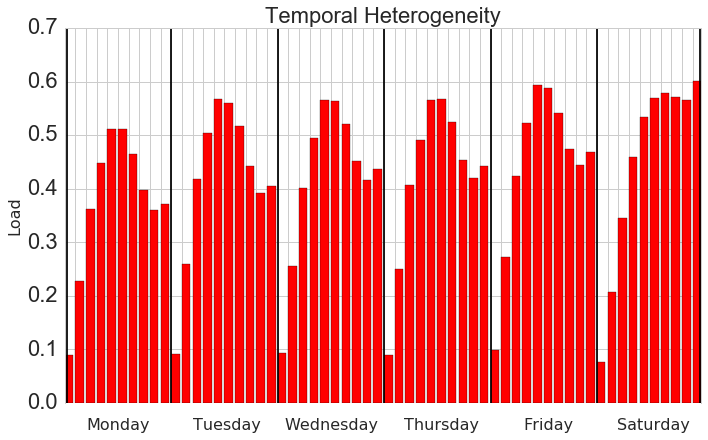

In [17]:
bins = range(P)
counts = np.mean(avg_loads, axis=0)

sns.set()
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.set_xticks(bins)
ax.spines['bottom'].set_visible(False)

ax.set_xticklabels([])
plt.setp(ax.get_yticklabels(), fontsize=22)
ax.yaxis.set_ticks_position('left')

plt.bar(bins, counts, color='red')

ax.axvline(x=0.2, color='black')
ax.axvline(x=10, color='black')
ax.axvline(x=20, color='black')
ax.axvline(x=30, color='black')
ax.axvline(x=40, color='black')
ax.axvline(x=50, color='black')
ax.axvline(x=59.7, color='black')

plt.title('Temporal Heterogeneity', fontsize=22)
#plt.xlabel('Blockface Key', fontsize=22)
plt.ylabel('Load', fontsize=16)

ax.annotate('Monday',xy=(2,-.05),xytext=(2,-.05), annotation_clip=False, fontsize=16)
ax.annotate('Tuesday',xy=(12,-.05),xytext=(12,-.05), annotation_clip=False, fontsize=16)
ax.annotate('Wednesday',xy=(20.65,-.05),xytext=(20.65,-.05), annotation_clip=False, fontsize=16)
ax.annotate('Thursday',xy=(31.90,-.05),xytext=(31.90,-.05), annotation_clip=False, fontsize=16)
ax.annotate('Friday',xy=(43.1,-.05),xytext=(43.1,-.05), annotation_clip=False, fontsize=16)
ax.annotate('Saturday',xy=(51.9,-.05),xytext=(51.9,-.05), annotation_clip=False, fontsize=16)

plt.tight_layout()

sns.reset_orig()

plt.show()

In [18]:
week_begins = [i for i in range(0,70,10)]

days = []

for i in range(6):
    days.append([range(week_begins[i], week_begins[i+1])])

time_means = np.mean(avg_loads, axis=0)

In [19]:
times = []
for key in park_data:
    times.extend(park_data[key]['Datetime'].dt.time.unique())
times = np.array(times)
np.unique(times)

array([datetime.time(8, 0), datetime.time(9, 0), datetime.time(10, 0),
       datetime.time(11, 0), datetime.time(12, 0), datetime.time(13, 0),
       datetime.time(14, 0), datetime.time(15, 0), datetime.time(16, 0),
       datetime.time(17, 0)], dtype=object)

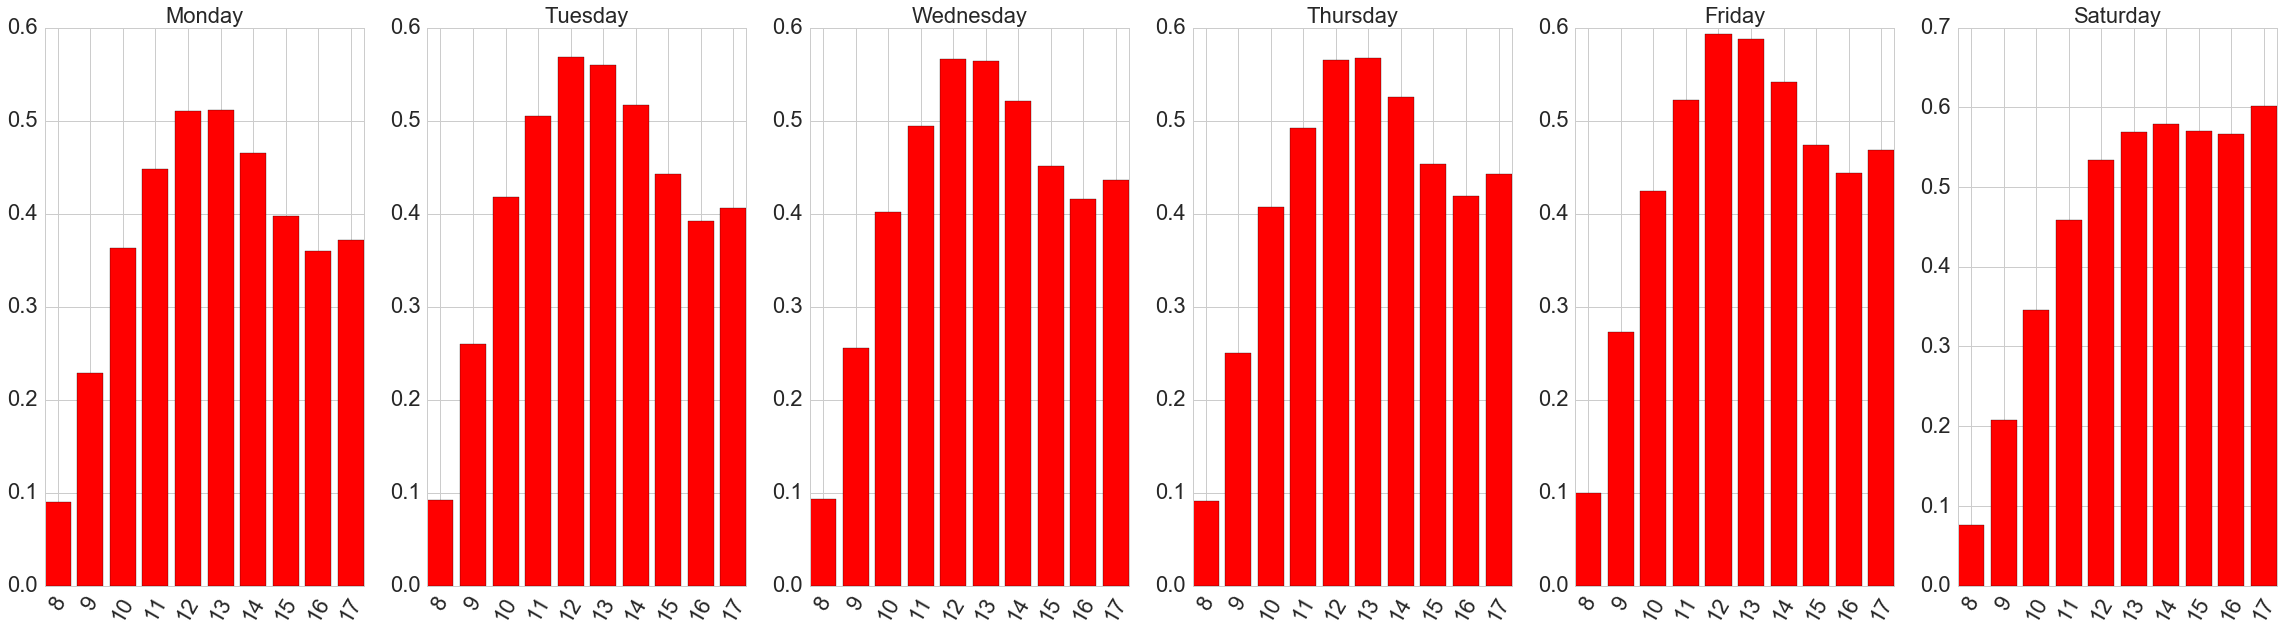

In [20]:
sns.set()
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows=1,ncols=6,figsize=(40,10))

day_dict = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
i = 1

for day in days:
    bins = range(8,10+8)
    counts = time_means[day]

    ax1 = plt.subplot(1,6,i)
    
    ax1.set_xticks(np.arange(min(bins), max(bins)+1, 1))
    
    plt.title(day_dict[i], fontsize=22)
    
    plt.setp(ax1.get_xticklabels(), fontsize=22, rotation=60)
    plt.setp(ax1.get_yticklabels(), fontsize=22)
    
    plt.bar(bins, counts, color='red', align='center')
    
    i += 1
    
plt.show()
sns.reset_orig()

In [21]:
week_begins = [i for i in range(0,60,10)]

hours = []
for i in range(10):
    hours.append([hour + i for hour in week_begins])

time_means = np.mean(avg_loads, axis=0)

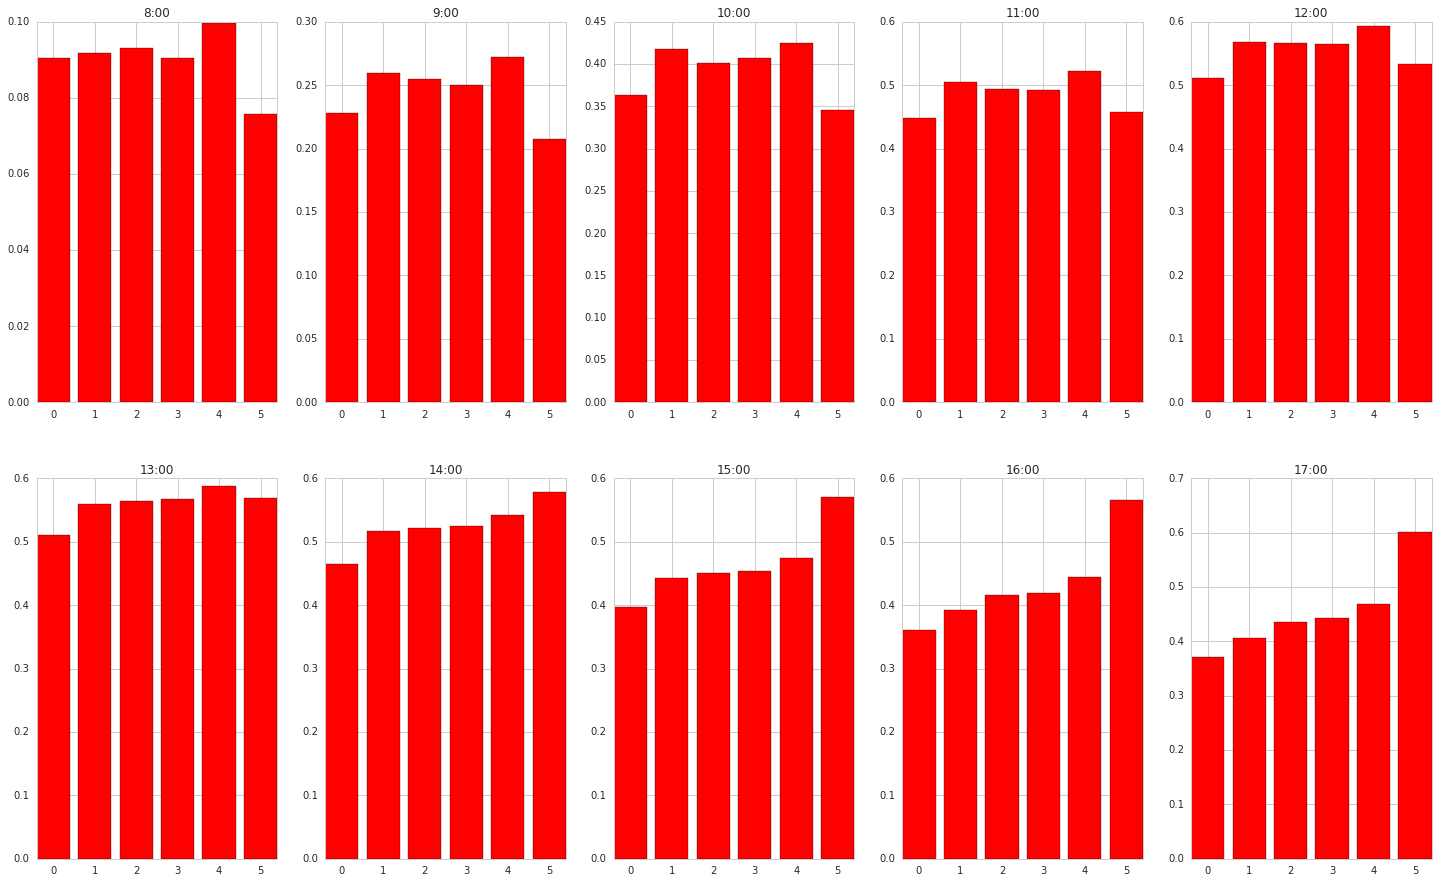

In [22]:
sns.set()
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows=2,ncols=5,figsize=(25,15))

i = 1
for hour in hours:
    bins = range(6)
    counts = time_means[hour]
    
    
    ax1 = plt.subplot(2,5,i)
    
    ax1.set_xticks(np.arange(min(bins), max(bins)+1, 1))
    ax1.title.set_text(str(7+i) + ':00')
    plt.bar(bins, counts, color='red', align='center')
    
    i += 1
    
plt.show()
sns.reset_orig()